<a href="https://colab.research.google.com/github/AbhishekK0412/BostonHousePricing/blob/main/Cats_V_Dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:09<00:00, 159MB/s]
100% 1.06G/1.06G [00:09<00:00, 125MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [15]:
import tensorflow as tf 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [16]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [17]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [18]:
# Create CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding ='valid',activation = 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding ='valid',activation = 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding ='valid',activation = 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [20]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 107ms/step - loss: 1.3456 - accuracy: 0.5786 - val_loss: 0.6499 - val_accuracy: 0.6266
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.6167 - accuracy: 0.6377 - val_loss: 0.5701 - val_accuracy: 0.7132
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5486 - accuracy: 0.7068 - val_loss: 0.6134 - val_accuracy: 0.7104
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4759 - accuracy: 0.7606 - val_loss: 0.4877 - val_accuracy: 0.7672
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4343 - accuracy: 0.7849 - val_loss: 0.5658 - val_accuracy: 0.7346
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3738 - accuracy: 0.8153 - val_loss: 0.5293 - val_accuracy: 0.7840
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3156 - accuracy: 0.8445 - val_loss: 0.4680 - val_ac

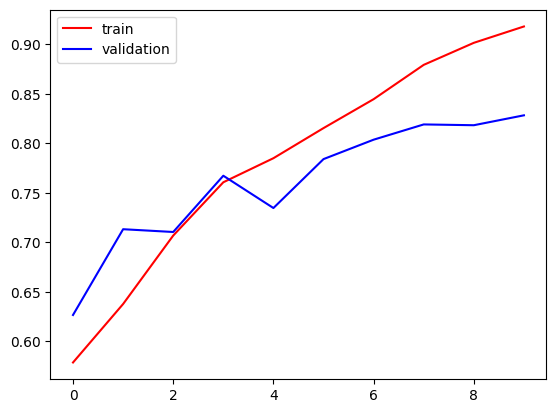

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

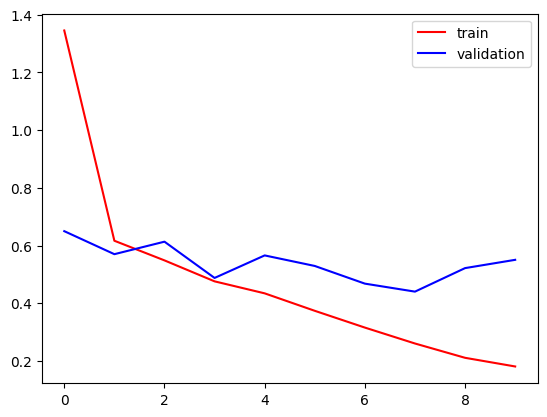

In [24]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

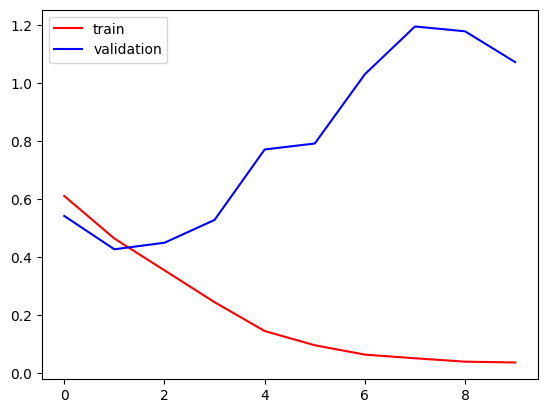

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [25]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [26]:
import cv2

In [27]:
test_img = cv2.imread('/content/golden-retriever-puppy.jpg')

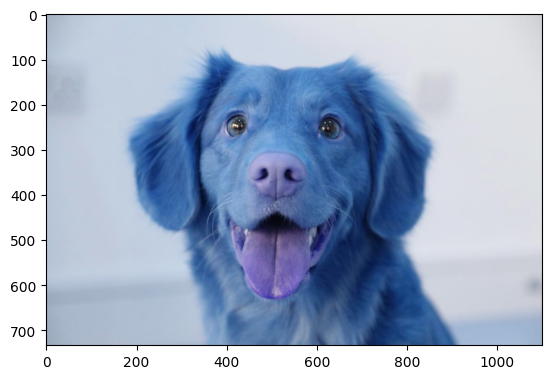

In [28]:
plt.imshow(test_img)

In [29]:
test_img.shape

(734, 1100, 3)

In [32]:
test_img = cv2.resize(test_img,(256,256))

In [33]:
test_input = test_img.reshape((1,256,256,3))

In [34]:
model.predict(test_input)

1/1 [==============================] - 1s 638ms/step


array([[1.]], dtype=float32)

In [40]:
test_img_1 = cv2.imread('/content/download.jpeg')

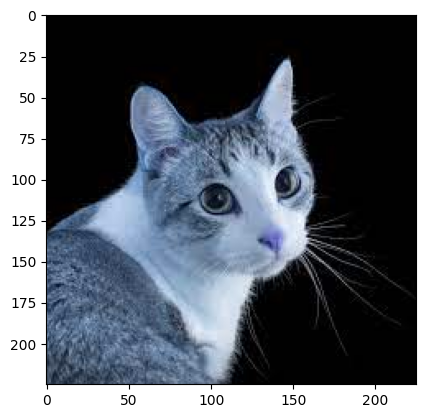

In [41]:
plt.imshow(test_img_1)

In [42]:
test_img_1.shape

(225, 225, 3)